In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
dataset = pd.read_csv("Mall_Customers.csv")
x = dataset.iloc[:,1:].values

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

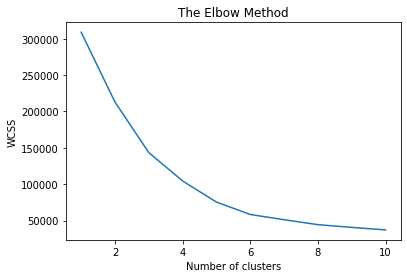

In [61]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[[ 0.47222222  0.52777778 40.66666667 87.75       17.58333333]
 [ 0.58227848  0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.60869565  0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.53846154  0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.60869565  0.39130435 45.2173913  26.30434783 20.91304348]] aaaaaa


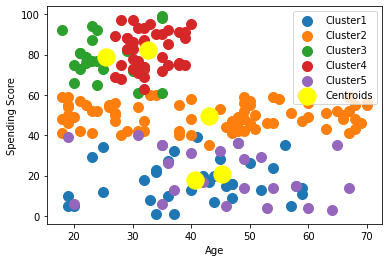

In [73]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42).fit(x)
y_kmeans = kmeans.predict(x)


plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,4],s=100,label="Cluster1")
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,4],s=100,label="Cluster2")
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,4],s=100,label="Cluster3")
plt.scatter(x[y_kmeans==3,2],x[y_kmeans==3,4],s=100,label="Cluster4")
plt.scatter(x[y_kmeans==4,2],x[y_kmeans==4,4],s=100,label="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,4],s=300,label="Centroids",c="yellow")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()